In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import os
os.getcwd()

'd:\\project\\project'

In [3]:
ecom = pd.read_csv('D:\project\project\\ecommerce.csv')

<>:1: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:1: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
C:\Users\HP\AppData\Local\Temp\ipykernel_14728\2762755980.py:1: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
  ecom = pd.read_csv('D:\project\project\\ecommerce.csv')


# Summary of the data: 
This dataset represents a simulated year of operations for a global e-commerce platform, designed to test end-to-end data analysis and predictive modeling capabilities.

* Transaction_ID: Unique identifier for each transaction.
* Customer_ID: Unique identifier for the customer associated with the transaction.
* Product_ID: Unique identifier for the product purchased in the transaction.
* Transaction_Date: The date when the transaction occurred.
* Category: The category to which the product belongs (e.g., Electronics, Clothing).
* Units_Sold: The quantity of the product sold in the transaction.
* Discount_Applied: The discount percentage applied to the product during the transaction.
* Revenue: Total revenue generated from the transaction, calculated as Price x Units Sold x (1 - Discount).
* Clicks: Number of ad clicks associated with the product during the time of the transaction.
* Impressions: Number of ad impressions served during the campaign.
* Conversion_Rate: Calculated as Clicks / Impressions, representing the percentage of impressions that resulted in clicks.
* Ad_CTR: Click-through rate (CTR) for the advertisement, representing the effectiveness of the ad campaign.
* Ad_CPC: Cost-per-click for the advertisement.
* Ad_Spend: Total advertising spend for the product, calculated as Ad_CTR x Ad_CPC x 1000.

In [4]:
ecom.head(10)

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,10/6/2024,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,10/29/2024,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,4/4/2024,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,8/25/2024,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,5/5/2024,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31
5,d870c42d-2d96-4f8c-a125-0f348264c5af,Customer_16604,Product_132,9/22/2024,160,0.25,69.37,4,73,0.05,Electronics,North America,0.0153,1.13,17.29
6,1110dffb-5c4e-4c0d-b082-461809386e84,Customer_98,Product_609,12/8/2023,145,0.17,121.56,25,110,0.23,Clothing,North America,0.0889,1.97,175.13
7,f259105c-cbc9-4007-84b9-2a1d90b3cf7f,Customer_18688,Product_590,4/30/2024,121,0.28,208.64,1,208,0.00,Electronics,Asia,0.0133,1.22,16.23
8,2c2a232d-838c-43f8-a485-d954b6135ea6,Customer_883,Product_807,4/10/2024,152,0.20,757.34,27,73,0.37,Toys,North America,0.1562,1.55,242.11
9,6d22bd77-c31f-4df9-ac21-59f4b72e01e0,Customer_16891,Product_156,11/24/2024,152,0.17,163.74,10,299,0.03,Toys,North America,0.0728,0.75,54.60


In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  object 
 1   Customer_ID       100000 non-null  object 
 2   Product_ID        100000 non-null  object 
 3   Transaction_Date  100000 non-null  object 
 4   Units_Sold        100000 non-null  int64  
 5   Discount_Applied  100000 non-null  float64
 6   Revenue           100000 non-null  float64
 7   Clicks            100000 non-null  int64  
 8   Impressions       100000 non-null  int64  
 9   Conversion_Rate   100000 non-null  float64
 10  Category          100000 non-null  object 
 11  Region            100000 non-null  object 
 12  Ad_CTR            100000 non-null  float64
 13  Ad_CPC            100000 non-null  float64
 14  Ad_Spend          100000 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 11.4+ MB


In [6]:
ecom.describe()

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,128.328580,0.149871,553.110811,24.539170,254.539060,0.207802,0.104988,1.051250,110.477240
std,49.679873,0.086692,428.366294,14.412477,141.466606,2.549205,0.054806,0.549252,87.015846
min,51.000000,0.000000,7.650000,0.000000,10.000000,0.000000,0.010000,0.100000,1.050000
25%,84.000000,0.070000,221.260000,12.000000,132.000000,0.050000,0.057500,0.580000,38.610000
50%,127.000000,0.150000,428.155000,25.000000,254.000000,0.100000,0.105200,1.050000,87.240000
75%,166.000000,0.220000,805.865000,37.000000,377.000000,0.190000,0.152300,1.530000,164.220000
max,716.000000,0.300000,5704.180000,49.000000,499.000000,788.000000,0.200000,2.000000,399.600000


In [7]:
ecom.dtypes

Transaction_ID       object
Customer_ID          object
Product_ID           object
Transaction_Date     object
Units_Sold            int64
Discount_Applied    float64
Revenue             float64
Clicks                int64
Impressions           int64
Conversion_Rate     float64
Category             object
Region               object
Ad_CTR              float64
Ad_CPC              float64
Ad_Spend            float64
dtype: object

In [8]:
# Finding if there are any null values in the data: 

ecom.isnull().sum()

Transaction_ID      0
Customer_ID         0
Product_ID          0
Transaction_Date    0
Units_Sold          0
Discount_Applied    0
Revenue             0
Clicks              0
Impressions         0
Conversion_Rate     0
Category            0
Region              0
Ad_CTR              0
Ad_CPC              0
Ad_Spend            0
dtype: int64

In [ ]:
# Finding if there are any duplicated values in the data: 
ecom.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [28]:
ecom['Clicks'].describe()

count    100000.000000
mean         24.539170
std          14.412477
min           0.000000
25%          12.000000
50%          25.000000
75%          37.000000
max          49.000000
Name: Clicks, dtype: float64

In [29]:
Q1 = ecom['Clicks'].quantile(0.25)
Q3 = ecom['Clicks'].quantile(.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
print(lower_bound)
print(upper_bound)

-25.5
74.5


In [10]:
ecom['Category'].value_counts()

Category
Electronics        21533
Toys               20764
Home Appliances    19419
Clothing           19278
Books              19006
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_14728\22044477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=ecom, palette=colors)


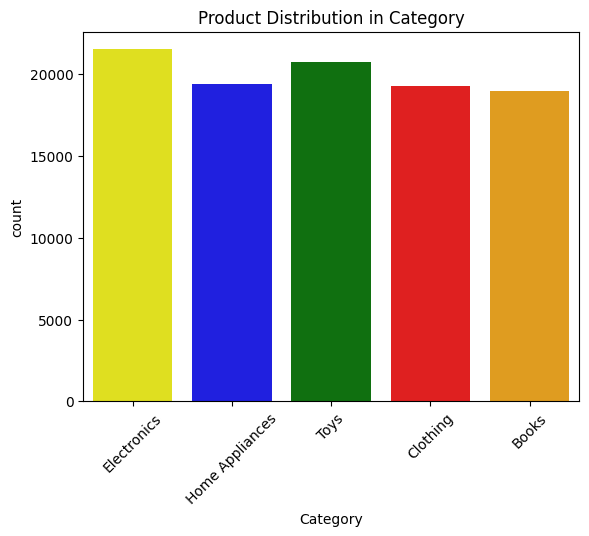

In [11]:
colors = ['yellow', 'blue', 'green', 'red', 'orange']
sns.countplot(x='Category', data=ecom, palette=colors)
plt.title('Product Distribution in Category')
plt.xticks(rotation=45)
plt.show()

In [12]:
ecom['Region'].value_counts()

Region
Asia             33472
Europe           33265
North America    33263
Name: count, dtype: int64

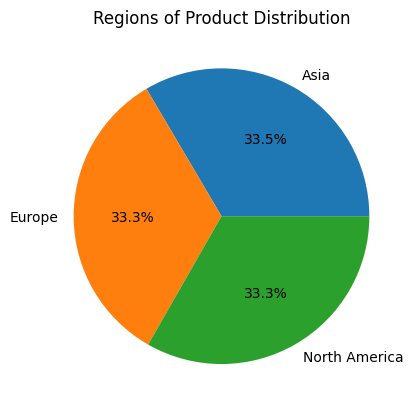

In [13]:
region = ecom['Region'].value_counts()

plt.pie(region, labels=region.index, autopct='%1.1f%%')
plt.title('Regions of Product Distribution')
plt.show()

In [14]:
group1 =ecom.groupby('Category')["Units_Sold"].mean()
group1

Category
Books              116.771335
Clothing           128.198413
Electronics        139.409279
Home Appliances    122.091457
Toys               133.370208
Name: Units_Sold, dtype: float64

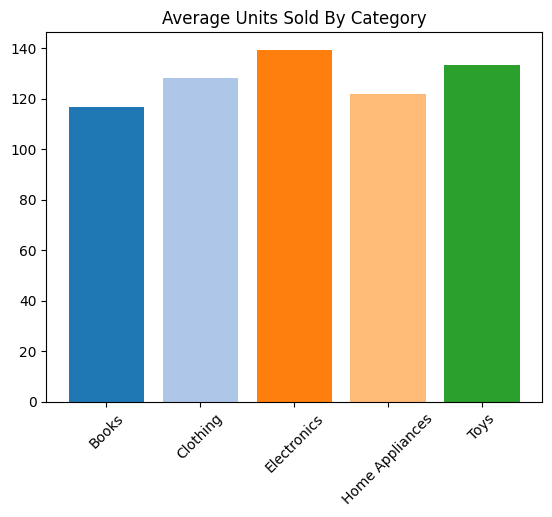

In [15]:
plt.bar(x=group1.index,height=group1.values,color=plt.cm.tab20(range(len(group1))))
plt.xticks(rotation=45)
plt.title('Average Units Sold By Category')
plt.show()



In [16]:
ecom['Transaction_Date'] = pd.to_datetime(ecom['Transaction_Date'],errors='coerce')
ecom['Transaction_month'] = ecom['Transaction_Date'].dt.month_name()
ecom[['Transaction_Date', 'Transaction_month']].head()

,Transaction_Date,Transaction_month
0,2024-10-06,October
1,2024-10-29,October
2,2024-04-04,April
3,2024-08-25,August
4,2024-05-05,May


In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

ecom['Transaction_month'] = pd.Categorical(
    ecom['Transaction_month'],
    categories=month_order,
    ordered=True
)

C:\Users\HP\AppData\Local\Temp\ipykernel_14728\137058352.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rev = ecom.groupby(['Transaction_month', 'Category'])['Revenue'].sum().reset_index()


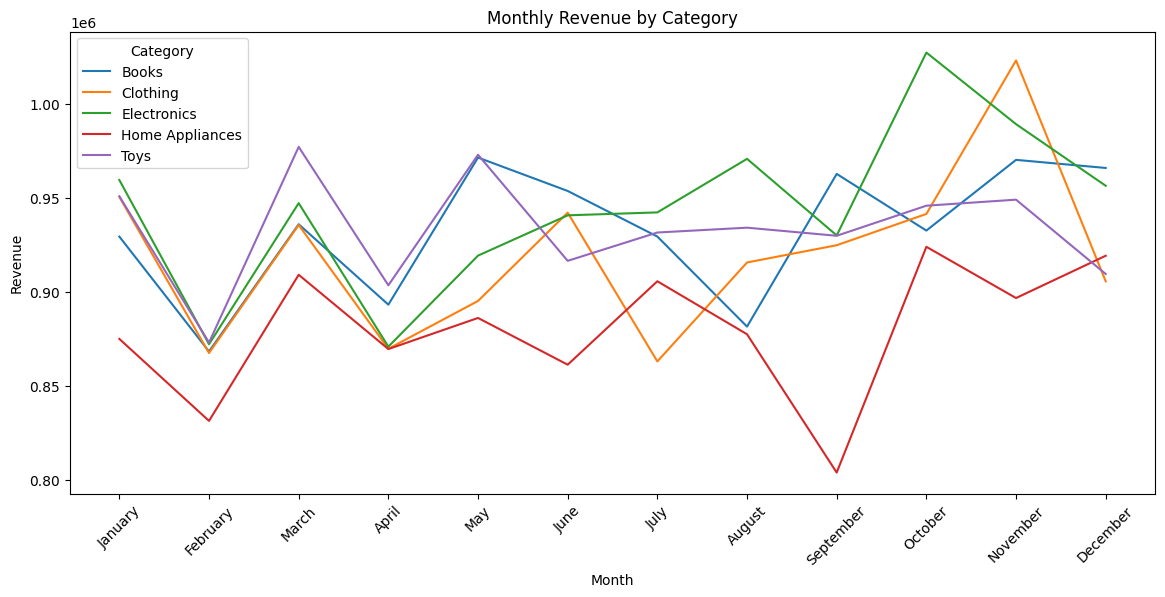

In [18]:
monthly_rev = ecom.groupby(['Transaction_month', 'Category'])['Revenue'].sum().reset_index()


plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_rev, x='Transaction_month', y='Revenue', hue='Category')

plt.xticks(rotation=45)
plt.title('Monthly Revenue by Category')
plt.xlabel("Month")
plt.show()

In [19]:
ecom.head()

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend,Transaction_month
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90,October
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56,October
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40,April
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54,August
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31,May


C:\Users\HP\AppData\Local\Temp\ipykernel_14728\162455430.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Ad_Spend', data=ecom, palette='Set2')


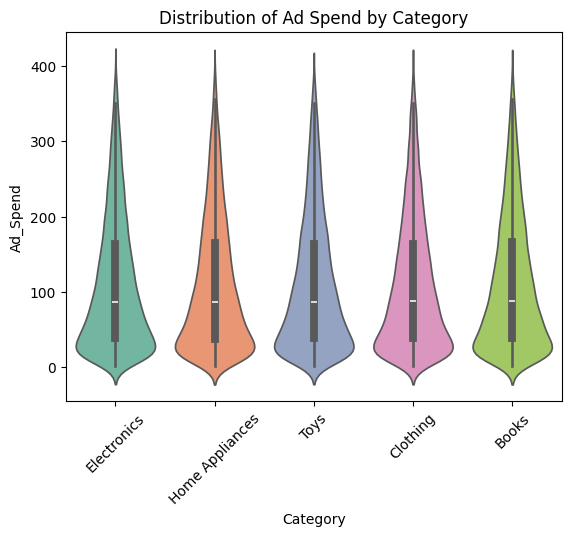

In [20]:
sns.violinplot(x='Category', y='Ad_Spend', data=ecom, palette='Set2')
plt.title('Distribution of Ad Spend by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14728\4260278399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_ad, x='Category', y='Ad_Spend', palette='viridis')


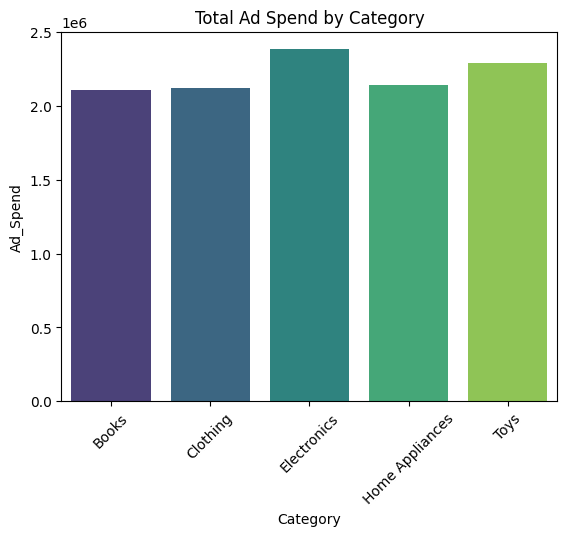

In [21]:
total_ad = ecom.groupby('Category')['Ad_Spend'].sum().reset_index()

sns.barplot(data=total_ad, x='Category', y='Ad_Spend', palette='viridis')
plt.title("Total Ad Spend by Category")
plt.xticks(rotation=45)
plt.show()


In [26]:
total_ad.head()

,Category,Ad_Spend
0,Books,2109870.58
1,Clothing,2123384.33
2,Electronics,2382432.58
3,Home Appliances,2143318.22
4,Toys,2288718.26


In [22]:
ecom['Category'].head(2)

0        Electronics
1    Home Appliances
Name: Category, dtype: object

In [23]:
total_revenue = ecom.groupby('Category')['Revenue'].sum().reset_index().sort_values('Revenue')
total_revenue

,Category,Revenue
3,Home Appliances,10559207.22
1,Clothing,11034899.26
4,Toys,11194842.46
0,Books,11195311.88
2,Electronics,11326820.25


C:\Users\HP\AppData\Local\Temp\ipykernel_14728\494673962.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Revenue', data=total_revenue, palette='magma')


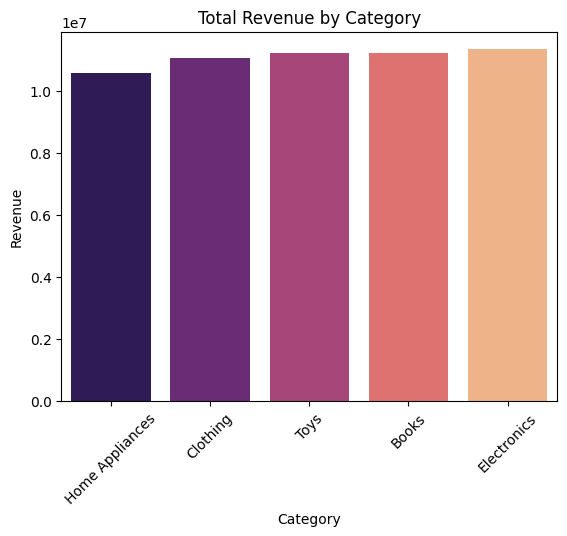

In [27]:
sns.barplot(x='Category', y='Revenue', data=total_revenue, palette='magma')
plt.title('Total Revenue by Category')
plt.xticks(rotation=45)
plt.show()

   Ad_Spend  Ad_CTR  Ad_CPC  Impressions  Clicks  Conversion_Rate
0      9.90  0.0180    0.55           65      11             0.17
1     63.56  0.1589    0.40          201      15             0.07
2     89.40  0.0596    1.50          199      16             0.08
3     19.54  0.0444    0.44          355      12             0.03
4     67.31  0.1270    0.53          355      44             0.12


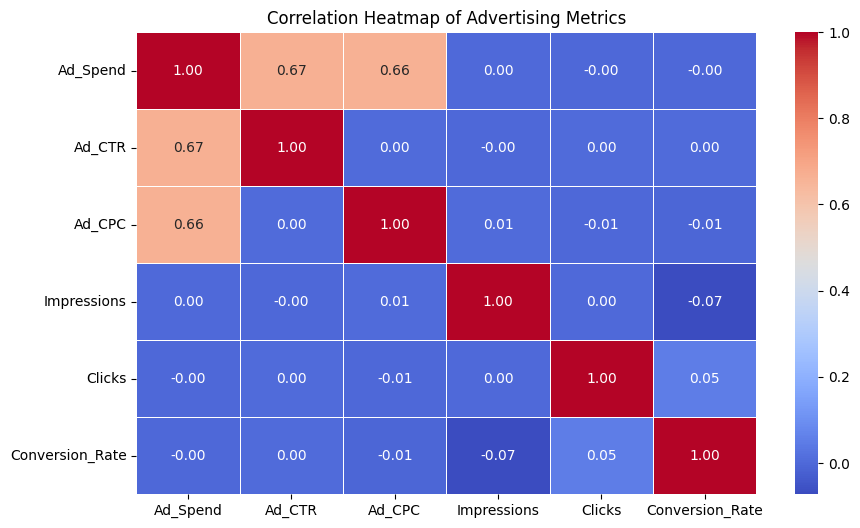

In [ ]:
cols = ['Ad_Spend', 'Ad_CTR', 'Ad_CPC', 'Impressions', 'Clicks', 'Conversion_Rate']


print(ecom[cols].head())


plt.figure(figsize=(10,6))
sns.heatmap(
    ecom[cols].corr(),  
    annot=True,         
    cmap='coolwarm',    
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Advertising Metrics")
plt.show()